In [61]:
# Check
# few common alleles and het close to 1
# ones very different in h3africa vs. 1000G AFR
# why many are stuck at het=0.5? creates weird structure in the graph

In [2]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.colors import LogNorm
import os
import seaborn as sns
import scipy.stats

import pandas as pd

dfs = []
for chrom in range(1, 23):
    if not os.path.exists("chr%s.period.tab"%chrom): continue
    data = pd.read_csv("chr%s.stats.tab"%chrom, sep="\t")
    perdata = pd.read_csv("chr%s.period.tab"%chrom, sep="\t", names=["chrom","start","period"])
    data = pd.merge(data, perdata, on=["chrom","start"])
    dfs.append(data)
data = pd.concat(dfs)
data_other = data[data["period"] != 1]
data_hom = data[data["period"] == 1]

Populating the interactive namespace from numpy and matplotlib


# Number of alleles vs. heterozygosity

Goal is to show there is a big spread

[0.7407461352642645, 0.12557790209402192, 0.0498586084375192, 0.034357059768898614, 0.02406430888557291, 0.014453249627943015, 0.007083449755958361, 0.0027406381347014727, 0.0007847380342312243, 0.00017537706068046299]
[0.008709677715786898, 0.34396850402398604, 0.5677747217806041, 0.702344772891132, 0.7835197430724254, 0.8330285185439089, 0.8657799692264652, 0.8879602313810556, 0.9047727272727272, 0.9147401129943502]
Het=0: 0.47239545248272485 TFs
[0.32819083397842874, 0.3244888526105642, 0.19057547194993965, 0.09649737770465916, 0.04208878854591511, 0.013938275958475991, 0.0034434748890459286, 0.0006870090659908034, 8.570051743443559e-05, 4.214779545955848e-06]
[0.03462712998287671, 0.3565438815404931, 0.5472260999056382, 0.6719312513649268, 0.7520951665665264, 0.8058242112690253, 0.8440754793961649, 0.8722883435582821, 0.8884754098360657, 0.9086666666666666]
Het=0: 0.040373373270711076 TFs


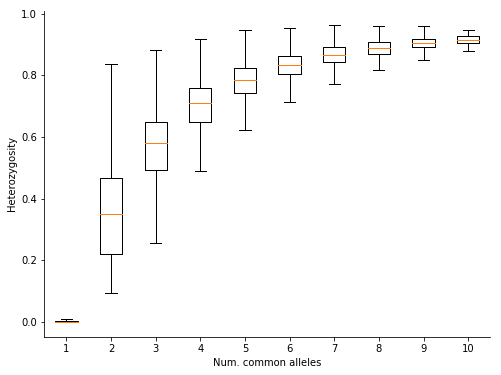

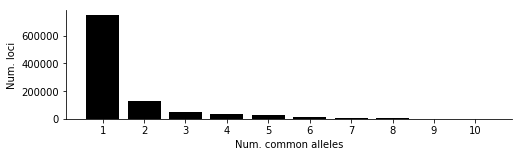

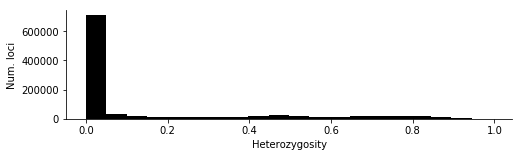

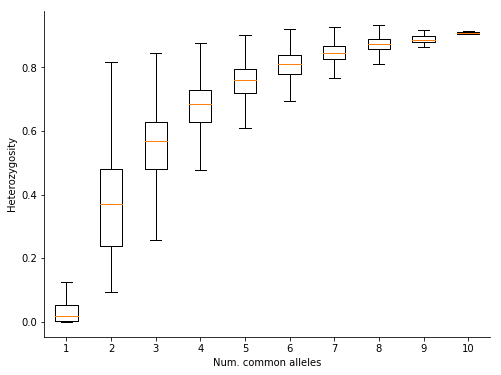

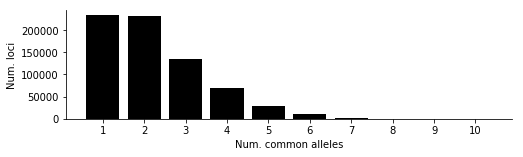

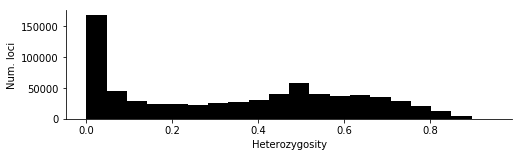

In [3]:
MAX_N = 10

for (prefix, df) in [("other",data_other), ("hom", data_hom)]:
    # Plot num alleles vs. het
    fig = plt.figure()
    fig.set_size_inches((8, 6))
    ax = fig.add_subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    boxdata = []
    for n in range(1, MAX_N+1):
        boxdata.append(list(df[df["nalleles-ALL"]==n]["het-ALL"]))
    ax.boxplot(boxdata, sym="");
    ax.set_xlabel("Num. common alleles")
    ax.set_ylabel("Heterozygosity");
    fig.savefig("HetVsNallele-Boxplot-%s.pdf"%prefix)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches((8, 2))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.bar(range(1, MAX_N+1), [df[df["nalleles-ALL"]==n].shape[0] for n in range(1, MAX_N+1)],
          color="black");
    ax.set_xticks(range(1,MAX_N+1))
    ax.set_xticklabels(range(1,MAX_N+1));
    ax.set_xlabel("Num. common alleles")
    ax.set_ylabel("Num. loci");
    fig.savefig("HetVsNallele-NAlleleHist-%s.pdf"%prefix)

    # Print percentages to annotate and cite in the text
    print([df[df["nalleles-ALL"]==n].shape[0]/df.shape[0] for n in range(1, MAX_N+1)])
    print([np.mean(df[df["nalleles-ALL"]==n]["het-ALL"]) for n in range(1, MAX_N+1)])

    # How many have het nearly 0?
    x = (df[df["het-ALL"]<0.001].shape[0])/(df.shape[0])
    print("Het=0: %s TFs"%x)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches((8, 2))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.hist(df["het-ALL"], color="black", bins=20)
    ax.set_xlabel("Heterozygosity")
    ax.set_ylabel("Num. loci");
    fig.savefig("HetVsNallele-HetHist-%s.pdf"%prefix)

# Pairwise population comparisons (het)

EUR AFR other r=0.93 p=0.0
EUR EAS other r=0.95 p=0.0
EUR SAS other r=0.98 p=0.0
EUR AMR other r=0.99 p=0.0
EUR H3A other r=0.92 p=0.0
AFR EAS other r=0.91 p=0.0
AFR SAS other r=0.93 p=0.0
AFR AMR other r=0.94 p=0.0
AFR H3A other r=0.99 p=0.0
EAS SAS other r=0.96 p=0.0
EAS AMR other r=0.96 p=0.0
EAS H3A other r=0.90 p=0.0
SAS AMR other r=0.98 p=0.0
SAS H3A other r=0.92 p=0.0
AMR H3A other r=0.93 p=0.0
EUR AFR hom r=0.84 p=0.0
EUR EAS hom r=0.88 p=0.0
EUR SAS hom r=0.96 p=0.0
EUR AMR hom r=0.97 p=0.0
EUR H3A hom r=0.82 p=0.0
AFR EAS hom r=0.81 p=0.0
AFR SAS hom r=0.85 p=0.0
AFR AMR hom r=0.87 p=0.0
AFR H3A hom r=0.97 p=0.0
EAS SAS hom r=0.92 p=0.0
EAS AMR hom r=0.92 p=0.0
EAS H3A hom r=0.79 p=0.0
SAS AMR hom r=0.96 p=0.0
SAS H3A hom r=0.83 p=0.0
AMR H3A hom r=0.84 p=0.0


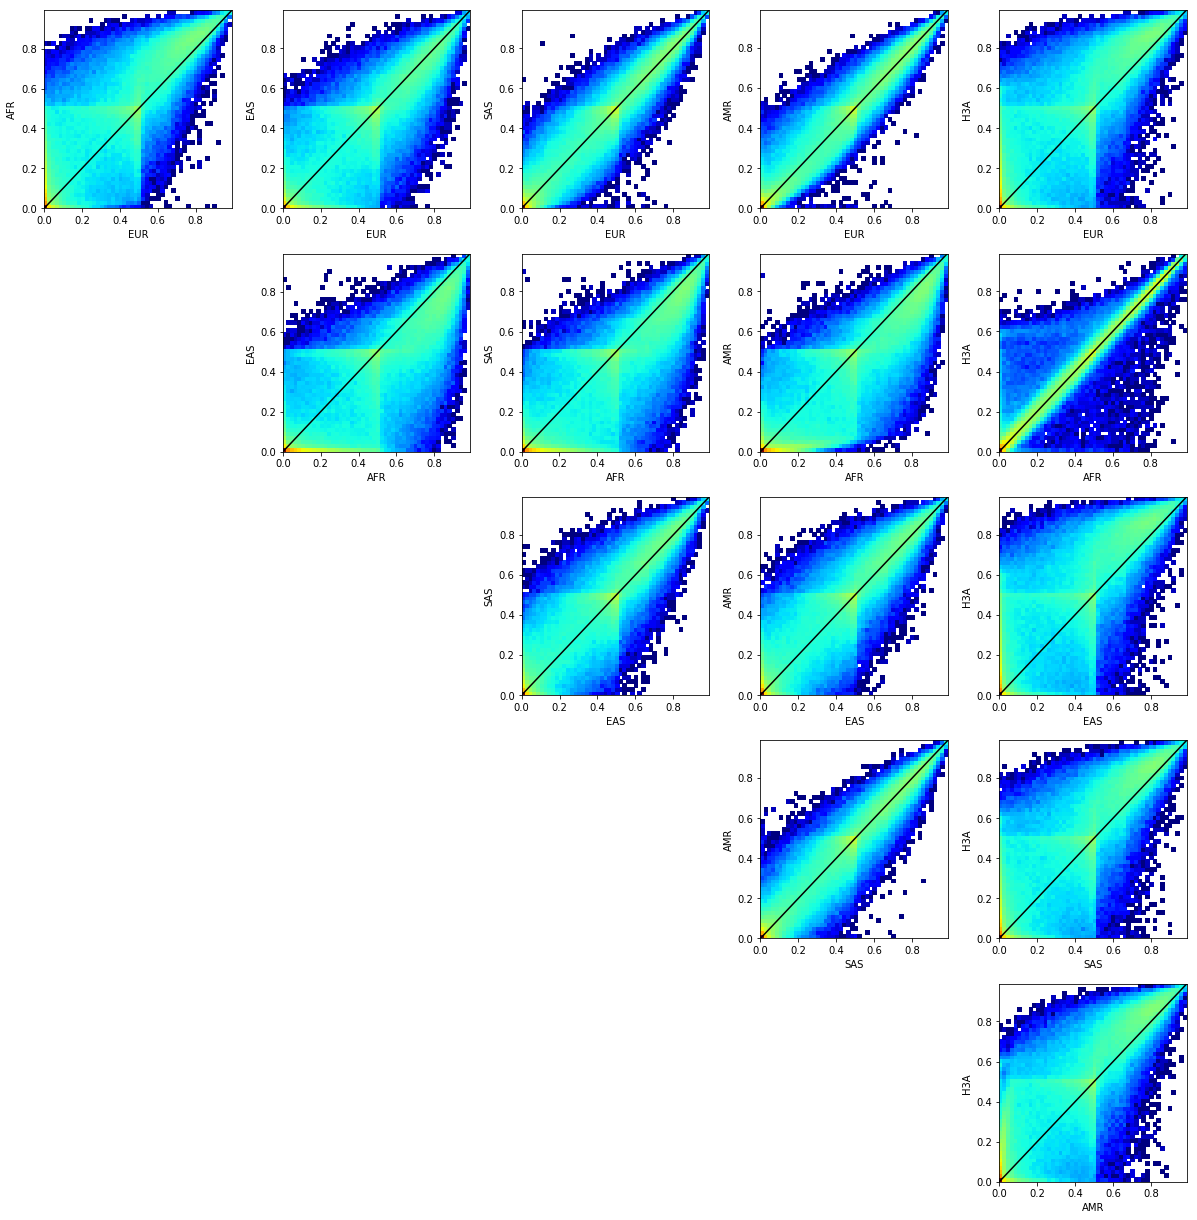

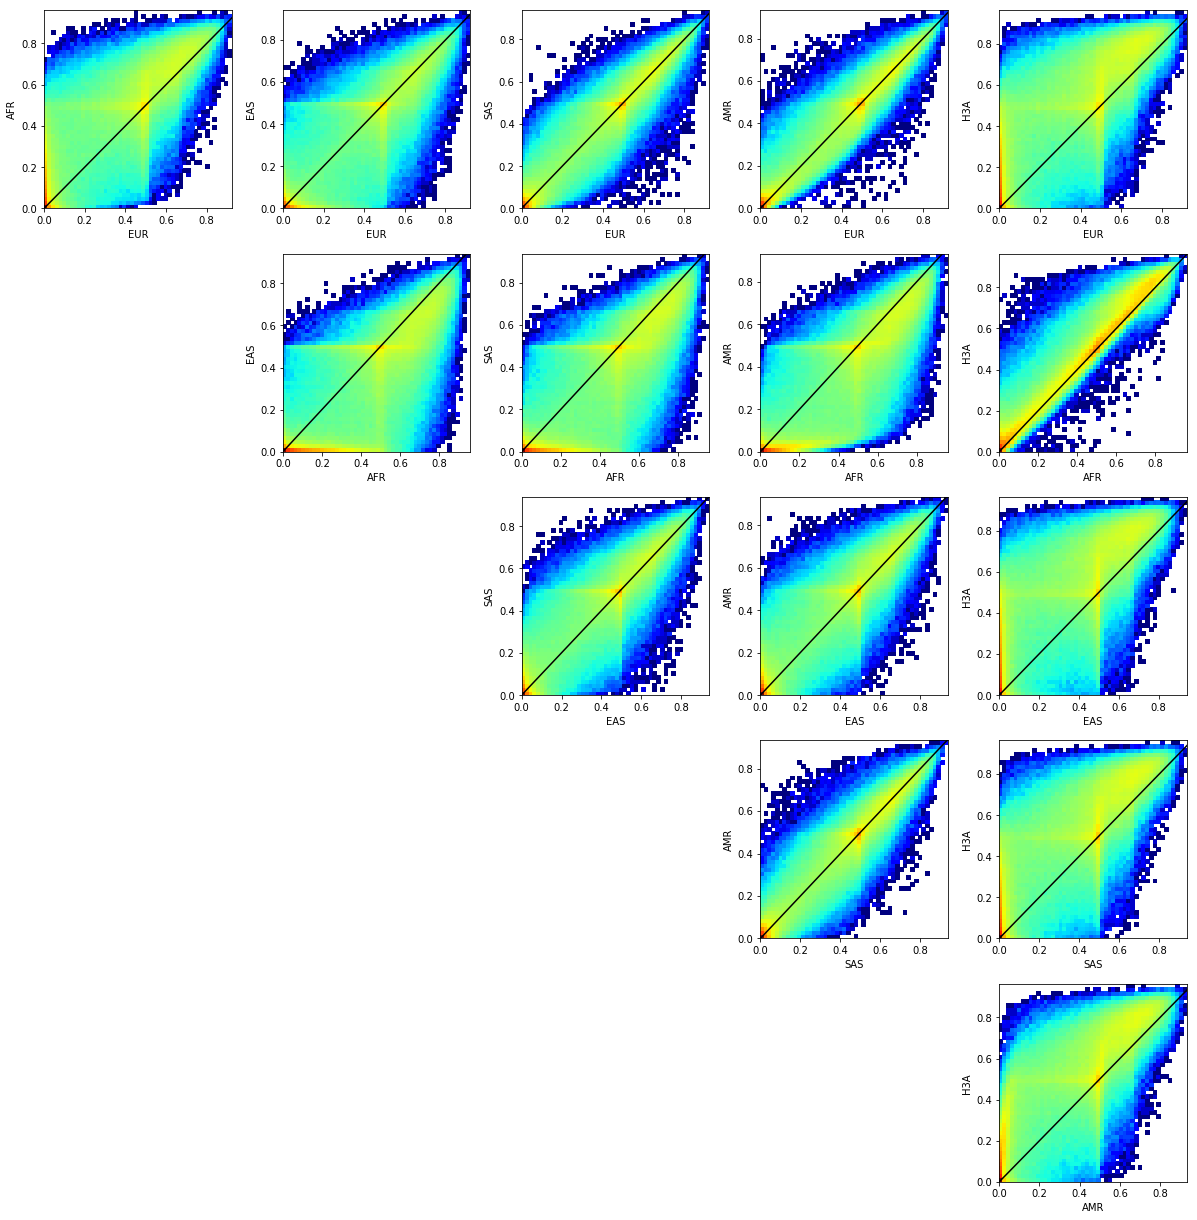

In [29]:
spops = ["EUR","AFR","EAS","SAS","AMR","H3A"]
mycmap = plt.cm.jet

for (prefix, df) in [("other",data_other), ("hom", data_hom)]:
    fig = plt.figure()
    fig.set_size_inches((20, 20))
    pltnum = 1
    for i in range(len(spops)):
        for j in range(i, len(spops)):
            if i==j: continue
            ax = fig.add_subplot(6, 6, i*6+j)
            pop1 = spops[i]
            pop2 = spops[j]
            xx = df[~np.isnan(df["het-%s"%pop1]) & ~np.isnan(df["het-%s"%pop2])]
            
            r, p = scipy.stats.pearsonr(xx["het-%s"%pop1], xx["het-%s"%pop2])
            print("%s %s %s r=%.2f p=%s"%(pop1, pop2, prefix, r, p))
        
            ax.hist2d(xx["het-%s"%pop1], xx["het-%s"%pop2], bins=50,
                  norm=LogNorm(), cmap=mycmap);
            ax.plot([0,1],[0,1], color="black")
            ax.set_xlabel(pop1)
            ax.set_ylabel(pop2)
    fig.tight_layout()

In [45]:
data[(data["het-ALL"]>0.5)& (data["het-EUR"]<0.01) & (data["period"]!=1) & (data["nalleles-ALL"]>2)]

,chrom,start,end,nalleles-ALL,nalleles-EUR,nalleles-EAS,nalleles-SAS,nalleles-AMR,nalleles-AFR,nalleles-H3A,het-ALL,het-EUR,het-EAS,het-SAS,het-AMR,het-AFR,het-H3A,period
106870,chr2,179989249,179989272,3,1,2,1,1,4,2,0.541,0.00944,0.547,0.0116,0.0283,0.672,0.143,3
108786,chr2,183592349,183592364,3,1,3,1,3,2,2,0.617,0.00316,0.620,0.0117,0.5230,0.517,0.501,2
105311,chr3,175281119,175281135,3,1,4,3,3,4,5,0.565,0.00166,0.666,0.6420,0.4510,0.521,0.773,2
18953,chr5,32635565,32635615,3,1,4,2,3,3,1,0.556,0.00158,0.662,0.3030,0.5240,0.581,0.000,6
50477,chr14,95742951,95742977,3,1,2,2,2,2,2,0.522,0.00980,0.123,0.3390,0.3630,0.469,0.490,4
